In [1]:
%matplotlib inline

import numpy as np
from pprint import pprint

from PIL import Image
import matplotlib.pyplot as plt

import torch 
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import grad
import torchvision
from torchvision import models, datasets, transforms
import torch.nn.functional as func
#torch.manual_seed(50)

#import os
#os.environ["CUDA_VISIBLE_DEVICES"] = "1"

# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


print(torch.__version__, torchvision.__version__)

1.9.0+cu111 0.10.0+cu111


In [3]:
# dst = datasets.CIFAR100("~/.torch", download=True)
# dst = datasets.MNIST("~/.torch", download=True)

tp = transforms.Compose([
    transforms.Resize(32),
    transforms.CenterCrop(32),
    transforms.ToTensor()
])
tt = transforms.ToPILImage()

device = "cpu"
# if torch.cuda.is_available():
#     device = "cuda"
print("Running on %s" % device)

def label_to_onehot(target, num_classes=10):
    target = torch.unsqueeze(target, 1)
    onehot_target = torch.zeros(target.size(0), num_classes, device=target.device)
    onehot_target.scatter_(1, target, 1)
    return onehot_target

def cross_entropy_for_onehot(pred, target):
    return torch.mean(torch.sum(- target * F.log_softmax(pred, dim=-1), 1))

Running on cpu


In [4]:
# def weights_init(m):
#     if hasattr(m, "weight"):
#         m.weight.data.uniform_(-0.5, 0.5)
#         nn.init.xavier_uniform_(m.weight.data)
#     if hasattr(m, "bias"):
#         #m.bias.data.uniform_(-0.5, 0.5)
#         #nn.init.xavier_uniform(m.bias.data)
#         m.bias.data.fill_(0)



# class LeNet(nn.Module):

#     def __init__(self):

#         super(LeNet, self).__init__()
#         self.conv1 = nn.Conv2d(3, 6, kernel_size=5,stride=2)
#         self.conv2 = nn.Conv2d(6, 16, kernel_size=5, stride=2)
#         self.fc1 = nn.Linear(16*5*5, 256)
#         self.fc2 = nn.Linear(256, 120)
#         self.fc3 = nn.Linear(120, 106)

#     def forward(self, x):
#         #x = func.relu(self.conv1(x))
#         x = func.sigmoid(self.conv1(x))
#         #x = func.max_pool2d(x, 2)
#         #x = func.relu(self.conv2(x))
#         x = func.sigmoid(self.conv2(x))
#         #x = func.max_pool2d(x, 2)
#         x = x.view(x.size(0), -1)
#         #x = func.relu(self.fc1(x))
#         x = func.sigmoid(self.fc1(x))
#         #x = func.relu(self.fc2(x))
#         x = func.sigmoid(self.fc2(x))
#         x = self.fc3(x)
#         return x

    
    
# def weights_init(m):
#     if hasattr(m, "weight"):
#         m.weight.data.uniform_(-0.3, 0.3)
#     if hasattr(m, "bias"):
#         m.bias.data.uniform_(-0.3, 0.3)


def weights_init(m):
    if hasattr(m, "weight"):
        m.weight.data.uniform_(-0.5, 0.5)
    if hasattr(m, "bias"):
        m.bias.data.uniform_(-0.5, 0.5)


class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        act = nn.Sigmoid
        self.body = nn.Sequential(
            nn.Conv2d(3, 12, kernel_size=5, padding=5//2, stride=2),
            act(),
            nn.Conv2d(12, 12, kernel_size=5, padding=5//2, stride=2),
            act(),
            nn.Conv2d(12, 12, kernel_size=5, padding=5//2, stride=1),
            act(),
            nn.Conv2d(12, 12, kernel_size=5, padding=5//2, stride=1),
            act(),
        )
        self.fc = nn.Sequential(
            nn.Linear(768, 106)
        )
        
    def forward(self, x):
        out = self.body(x)
        out = out.view(out.size(0), -1)
        # print(out.size())
        out = self.fc(out)
        return out


net = LeNet().to(device)
net.apply(weights_init)

criterion = cross_entropy_for_onehot

In [4]:
cifar10 = fetch_mldata("cifar_10")

NameError: ignored

In [ ]:
print(cifar10)

In [ ]:
# dst = datasets.CIFAR100("~/.torch", download=True)

import torchvision.transforms as transforms
import torch.optim as optim
from torch.autograd import Variable
from torch.utils import data

from sklearn.datasets import fetch_lfw_people, fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from keras.datasets import cifar10
from sklearn.datasets import fetch_openml as fetch_mldata
# cifar10 = fetch_mldata("cifar_10_small")

# print(len(dst))
# print(len(dst[1][0]))

# lfw_people=fetch_olivetti_faces(resize=0.25)
# # x=dst.images
# # y=dst.target
# lfw_people=cifar10
# x=lfw_people.data
# y=lfw_people.target
# target_names=lfw_people.target_names
# n_classes=target_names.shape[0]
# dst = torch.tensor(dst)
# (X_train, y_train), (X_test, y_test) = cifar10.load_data()
# X_train, X_test, y_train, y_test = train_test_split(dst[0], dst[1], test_size=0.25,shuffle=False)


lfw_people=fetch_lfw_people(min_faces_per_person=14,color=True,slice_=(slice(61,189),slice(61,189)),resize=0.25)
x=lfw_people.images
y=lfw_people.target

target_names=lfw_people.target_names
n_classes=target_names.shape[0]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25,shuffle=False)


# print(trainX.shape)

# #two people
# X_train_two = []
# y_train_two = []
# X_test_two = []
# y_test_two = []
# for ct_d in range(X_train.shape[0]):
#     if  y_train[ct_d] == 6:
#         X_train_two.append(X_train[ct_d])
#         y_train_two.append(0)
#     if  y_train[ct_d] == 9:
#         X_train_two.append(X_train[ct_d])
#         y_train_two.append(1)
        
# for ct_d in range(X_test.shape[0]):
#     if  y_train[ct_d] == 6:        
#         X_test_two.append(X_test[ct_d])
#         y_test_two.append(0)
#     if  y_train[ct_d] == 9:
#         X_test_two.append(X_test[ct_d])
#         y_test_two.append(1)
        
# X_train = np.asarray(X_train_two)    
# X_test = np.asarray(X_test_two)  
# y_train = np.asarray(y_train_two)  
# y_test = np.asarray(y_test_two)  

# print (len(X_train[0]))
# print (len(X_test))
         
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
#X_train = torch.transpose
#X_train = X_train.astype('float32')
# X_train /= 255.0
# X_test /= 255.0

 


x_train = torch.FloatTensor(X_train).to(device)
x_train = x_train.transpose(2,3).transpose(1,2)
y_train = [int(x) for x in y_train]
y_train = torch.LongTensor(y_train).to(device)

x_test = torch.FloatTensor(X_test).to(device)
x_test = x_test.transpose(2,3).transpose(1,2)
y_test = [int(x) for x in y_test]
y_test = torch.LongTensor(y_test).to(device)


training = data.TensorDataset(x_train,y_train)
testing = data.TensorDataset(x_test,y_test)

dst_tensor=training
plt.imshow(tt(dst_tensor[i][0].cpu()))
criterion_train = nn.CrossEntropyLoss()
optimizer_train = optim.Adam(net.parameters(),lr=0.01)#,momentum=0.9)
trainloader = torch.utils.data.DataLoader(training,batch_size=64, shuffle=True)

iter_ = 0
for epoch in range(0):

    for i,data in enumerate(trainloader,0):
   
        #if epoch>=1:
        if i>=2:
            break
        iter_=iter_+1
        #print (iter_)
        inputs,label = data
        
        inputs,label =  Variable(inputs),Variable(label) 
      
        optimizer_train.zero_grad()
        
    
        outputs_benign=net(inputs)
        #outputs_benign = F.softmax(outputs_benign, dim=-1)
        #print (outputs_benign[0])
     
        loss_benign =  criterion_train(outputs_benign,label)
       
        #print("loss computed")
        loss_benign.backward()
        #print("loss BP")
        optimizer_train.step()
        
        #if i%2000==0:
        print (loss_benign.item())
        #torch.save(net.state_dict(),'./LFW_net.pth')  
       
  
print ('fininshed training')
total = len(y_test)
acc =0.0
for ct in range(total):
    testing_data = tt(testing[ct][0].cpu())
    testing_data1 = tp(testing_data).to(device)
    testing_data2 = testing_data1.view(1, *testing_data1.size())
    y_pred = net(testing_data2)
    predicted = torch.argmax(y_pred)
  
    if predicted == y_test[ct]:
        acc=acc+1
accuracy = acc / total
print (accuracy)
print ('fininshed testing')

In [ ]:
# Find the corresponging Image in this shuffling to compare with CPL

# ######### honest partipant #########
# for img_index in range(100):
#   dst_pil = tt(dst_tensor[img_index][0].cpu())   #use img_index

#   gt_data = tp(dst_pil).to(device)
#   gt_data = torch.unsqueeze(gt_data,0)

#   batch = 1  #
#   for bat in range(batch-1):
#       dst_pil = tt(dst_tensor[img_index+1+bat][0].cpu())   #use img_index
#       tmp = torch.unsqueeze(tp(dst_pil).to(device),0)
#       print(tmp.shape)
#       gt_data = torch.cat((gt_data,tmp),0)


#   print (gt_data.shape)
#   #gt_data = gt_data.view(1, *gt_data.size())
#   #gt_label = torch.Tensor([dst_pil[img_index][1]]).long().to(device)  #use img_index
#   gt_label = dst_tensor[img_index][1].long().to(device) #use img_index
#   gt_label = gt_label.view(1, )
#   gt_onehot_label = label_to_onehot(gt_label, num_classes=106)



#   plt.imshow(dst_pil)
#   #plt.savefig("./attack_image/original")
#   print(f"value of the index here is : { img_index }")
#   plt.title("Ground truth image")
#   print("GT label is %d." % gt_label.item(), "\nOnehot label is %d." % torch.argmax(gt_onehot_label, dim=-1).item())
#   plt.show()
#   # compute original gradient 
#   out = net(gt_data)
#   y = criterion(out, gt_onehot_label)
#   dy_dx = torch.autograd.grad(y, net.parameters())


#   # share the gradients with other clients
#   original_dy_dx = list((_.detach().clone() for _ in dy_dx))

In [ ]:


######### honest partipant #########
# img_index = 13   #use img_index
# dst_pil = tt(dst_tensor[img_index][0].cpu())   #use img_index

# gt_data = tp(dst_pil).to(device)
# gt_data = torch.unsqueeze(gt_data,0)

# batch = 5  #
# for bat in range(batch-1):
#     dst_pil = tt(dst_tensor[img_index+1+bat][0].cpu())   #use img_index
#     tmp = torch.unsqueeze(tp(dst_pil).to(device),0)
#     print(tmp.shape)
#     gt_data = torch.cat((gt_data,tmp),0)


# print (gt_data.shape)
# #gt_data = gt_data.view(1, *gt_data.size())
# #gt_label = torch.Tensor([dst_pil[img_index][1]]).long().to(device)  #use img_index
# gt_label = dst_tensor[img_index][1].long().to(device) #use img_index
# gt_label = gt_label.view(1, )
# gt_onehot_label = label_to_onehot(gt_label, num_classes=106)


######### honest participant #########
img_index = 8   #use img_index
dst_pil = tt(dst_tensor[img_index][0].cpu())   #use img_index

gt_data = tp(dst_pil).to(device)
gt_data = torch.unsqueeze(gt_data,0)

gt_label = dst_tensor[img_index][1].long().to(device) #use img_index
gt_label = gt_label.view(1, )
gt_onehot_label = label_to_onehot(gt_label, num_classes=106)

# for i in range(0,100):
#   plt.imshow(tt(dst_tensor[i][0].cpu()))
#   plt.show()
# plt.show()
# plt.axis('off')
# plt.savefig("./lfw_batch_idx_12")

print(gt_label)

batch = 1
#idx_m = [20,25,32,33,48,79,84]
#idx_m = [2]
idx_m = []
match = 1
for s in range(1000):
    if dst_tensor[s][1]==8:
        if match==1:
            match = match + 1
        else:    
            idx_m.append(s)
        
        # dst_pil = tt(dst_tensor[s][0].cpu())
        # plt.imshow(dst_pil)
        # plt.axis('off')
        #plt.savefig("./original/lfw_batch_idx_%s"%(len(idx_m)))
        
        
        if len(idx_m)==batch:
            break
print("idx is below")
print (idx_m)
            
for bat in range(batch-1):
            dst_pil = tt(dst_tensor[idx_m[bat+1]][0].cpu())   #use img_index
            tmp = torch.unsqueeze(tp(dst_pil).to(device),0)
            #print(tmp.shape)
            gt_data = torch.cat((gt_data,tmp),0)

            gt_label_tmp = dst_tensor[idx_m[bat+1]][1].long().to(device) #use img_index
            gt_label_tmp = gt_label_tmp.view(1, )
            gt_label = torch.cat((gt_label,gt_label_tmp),0)
            gt_onehot_label = torch.cat((gt_onehot_label,label_to_onehot(gt_label_tmp, num_classes=106)),0)

gt_label = torch.reshape(gt_label,(-1,1))    
print (gt_data.shape)
print (gt_label.shape)
print (gt_onehot_label.shape)
print (gt_label)



plt.imshow(dst_pil)
plt.axis('off')
#plt.savefig("./attack_image/original")

plt.title("Ground truth image")
# print("GT label is %d." % gt_label.item(), "\nOnehot label is %d." % torch.argmax(gt_onehot_label, dim=-1).item())

# compute original gradient 
out = net(gt_data)
y = criterion(out, gt_onehot_label)
dy_dx = torch.autograd.grad(y, net.parameters())


# share the gradients with other clients
original_dy_dx = list((_.detach().clone() for _ in dy_dx))

In [ ]:
2# generate dummy data and label
torch.manual_seed(1890)

usePatterned = True
print(gt_data.size())
aaa = torch.rand([3,8,8])
bbb = torch.cat((aaa,aaa),dim=1)
ccc = torch.cat((bbb,bbb),dim=1)
ddd = torch.cat((ccc,ccc),dim=2)
eee = torch.cat((ddd,ddd),dim=2)
dummy_data5 = torch.unsqueeze(eee,dim=0).to(device).requires_grad_(True)

dummy_data = torch.randn(gt_data.size()).to(device).requires_grad_(True)
dummy_label = torch.randn(gt_onehot_label.size()).to(device).requires_grad_(True)

print(dummy_label.size())

if usePatterned:
  dummy_data = dummy_data5

#aaa = torch.rand([3,16,16])
#bbb = torch.cat((aaa,aaa),dim=1)
#ccc = torch.cat((bbb,bbb),dim=2)
#dummy_data = torch.unsqueeze(ccc,dim=0).to(device).requires_grad_(True)


plt.imshow(tt(dummy_data[0].cpu()))
plt.title("Dummy data")
print("Dummy label is %d." % torch.argmax(dummy_label[0], dim=-1).item())



In [9]:
!pip install pytorch_msssim

In [ ]:
from pytorch_msssim import ssim
import torch.nn.functional as F
optimizer = torch.optim.LBFGS([dummy_data, dummy_label] )

history = []
history_batch = []
history.append(tt(dummy_data[0].cpu()))
mses = []
percept_dis = np.zeros(300)
recover_dis = np.zeros(300)
for iters in range(300):
    
    plt.imshow(tt(dummy_data[0].cpu()))
    plt.title("iter=%d" % (iters))
    plt.axis('off')
    
    print(dummy_data.size())
    print(gt_data[0].size())
    percept_dis[iters]=ssim(dummy_data[0][None,:].cpu(),gt_data[0][None,:],data_range=0).item()
    recover_dis[iters]=torch.dist(dummy_data.cpu(),gt_data,2).item()
    
        
    #print("Dummy label is %d." % torch.argmax(dummy_label, dim=-1).item())
    #plt.savefig("./attack_image/gif_iters_%s_label_%s"%(iters,torch.argmax(dummy_label, dim=-1).item()))
    #plt.clf()
    
    
    def closure():
        optimizer.zero_grad()

        pred = net(dummy_data) 
        dummy_onehot_label = F.softmax(dummy_label, dim=-1)
        
        #print (pred.shape)
        #print (dummy_onehot_label)
        dummy_loss = criterion(pred, dummy_onehot_label) # TODO: fix the gt_label to dummy_label in both code and slides.
        dummy_dy_dx = torch.autograd.grad(dummy_loss, net.parameters(), create_graph=True)
        dummy_dy_dp = torch.autograd.grad(dummy_loss, dummy_data, create_graph=True)
        #print (dummy_dy_dp[0].shape)
        
        grad_diff = 0
        grad_count = 0
        count =0
        for gx, gy in zip(dummy_dy_dx, original_dy_dx): # TODO: fix the variablas here
            grad_diff += ((gx - gy) ** 2).sum()
            
            
            grad_count += gx.nelement()
            
            #if count == 9:
            #    break
            count=count+1
        # grad_diff = grad_diff / grad_count * 1000
        grad_diff.backward()
        #print (count)
        
        #print (dummy_dy_dx)
        #print (original_dy_dx)
        
        
        return grad_diff
    

       
    optimizer.step(closure)
    if iters % 5 == 0: 
        current_loss = closure()
        print ("%.8f" % current_loss.item())
        #print(iters, "%.8f" % current_loss.item())
    history.append(tt(dummy_data[0].cpu()))
    
    mses.append(F.mse_loss(gt_data[0, :], dummy_data[0, :]))
  
plt.figure(figsize=(12, 1.5))
# iter_idx = [0,20,40,60,80,100,120,140,160,180] 
iter_idx = [0,5,10,20,50,80,100,200,300] 
for i in range(9):
  plt.subplot(1, 9, i + 1)
  plt.imshow(history[iter_idx[i]])
  plt.title("iter=%d" % (iter_idx[i]))
  plt.axis('off')
# plt.savefig("./attack_image/random.png")

    
    
#np.savetxt('ssim_dlg.out',percept_dis,fmt="%4f")
#np.savetxt('mse_ours.out',recover_dis,fmt="%4f")

    
#     for bat in range(batch-1):
#         history_batch.append(tt(dummy_data[bat].cpu()))
    

In [ ]:
import matplotlib as ply
# plt.figure(figsize=(12, 8))
# for i in range(60):
#   plt.subplot(6, 10, i + 1)
#   plt.imshow(history[i * 5])
#   plt.title("iter=%d" % (i * 5))
#   plt.axis('off')
# print("Dummy label is %d." % torch.argmax(dummy_label, dim=-1).item())

plt.figure(figsize=(9, 1.2))
for i in range(batch):
  plt.subplot(1,batch,i+1)
  plt.imshow(tt(gt_data[i].cpu()))
  plt.axis("off")

iter_idx = [0,10,20,40,50,100,150,200,300]
plt.figure(figsize=(9, 1.2))
for i in range(9):
  plt.subplot(1, 9, i + 1)
  plt.imshow(history[iter_idx[i]])
  plt.title("iter=%d" % (iter_idx[i]))
  plt.axis('off')

In [ ]:
client_iters = 1
fig = plt.figure()
a1 = fig.add_axes([0,0,1,1])
x = np.arange(1,301)
a1.plot(x,percept_dis)
a1.set_xlabel('Iterations')
a1.set_ylabel('SSIM')
# plt.ylim(0,1)
a2 = a1.twinx()
a2.plot(x, mses,'r')
# plt.ylim(0,0.09)
a2.set_ylabel('MSE')
fig.legend(labels = ('SSIM','MSE'),bbox_to_anchor=(1.1, 1),loc='center right')
plt.title(f"DLG: SSIM and MSE vs Iters, for B = { batch } and Client Iters = { client_iters }")
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
for j in range(batch):
    for i in range(60):
      plt.subplot(6, 10, i + 1)
      plt.imshow(history_batch[i * 5+j])
      plt.title("iter=%d" % (i * 5+ j))
      plt.axis('off')
print("Dummy label is %d." % torch.argmax(dummy_label, dim=-1).item())

client training loss
8.302400588989258
fininshed training
0.15954415954415954
fininshed testing
tensor([0])
idx is below
[10]
torch.Size([1, 3, 32, 32])
torch.Size([1, 1])
torch.Size([1, 106])
tensor([[0]])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


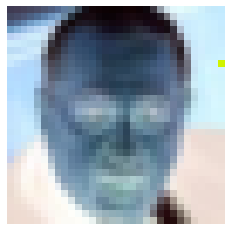

torch.Size([1, 3, 32, 32])
torch.Size([1, 106])
Dummy label is 90.
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
26.83436012
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
2.86936522
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
0.97409612
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
0.48527849
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32,

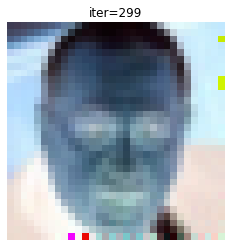

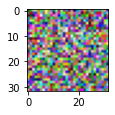

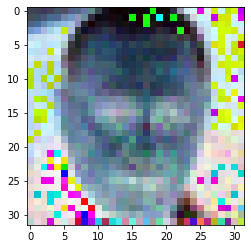

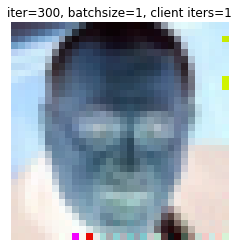

########### Showing the results for the current B-C_Iters comnbo#######
[1, 1, 0.9992906451225281, tensor(8.9190e-05, grad_fn=<MseLossBackward>), <PIL.Image.Image image mode=RGB size=32x32 at 0x7F6E9B955950>]
########### End of results for the current B-C_Iters comnbo#######
client training loss
3.667262315750122
fininshed training
0.38746438746438744
fininshed testing
tensor([0])
idx is below
[10, 14, 48, 49, 53]
torch.Size([5, 3, 32, 32])
torch.Size([5, 1])
torch.Size([5, 106])
tensor([[0],
        [0],
        [0],
        [0],
        [0]])


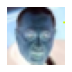

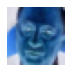

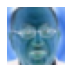

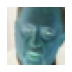

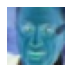

torch.Size([5, 3, 32, 32])
torch.Size([5, 106])
Dummy label is 23.
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
4.89693880
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
0.16027060
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
0.04916276
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
0.02119901
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 

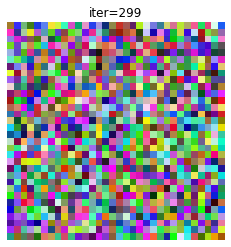

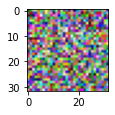

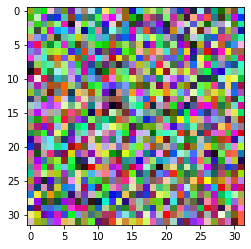

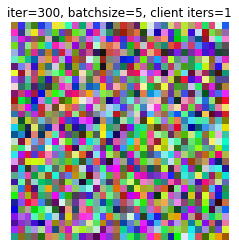

########### Showing the results for the current B-C_Iters comnbo#######
[5, 1, 0.00272969133220613, tensor(4.7470, grad_fn=<MseLossBackward>), <PIL.Image.Image image mode=RGB size=32x32 at 0x7F6E9AF78D50>]
########### End of results for the current B-C_Iters comnbo#######
client training loss
2.910963773727417
fininshed training
0.38746438746438744
fininshed testing
tensor([0])
idx is below
[10, 14, 48, 49, 53, 54, 79, 92, 100, 128]
torch.Size([10, 3, 32, 32])
torch.Size([10, 1])
torch.Size([10, 106])
tensor([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0]])


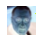

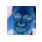

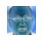

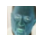

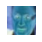

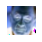

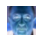

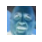

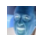

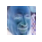

torch.Size([10, 3, 32, 32])
torch.Size([10, 106])
Dummy label is 71.
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
32.32010269
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
16.59815407
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
14.28925133
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
12.87971115
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])

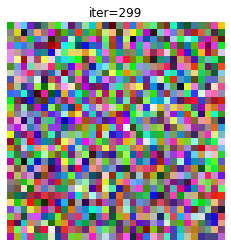

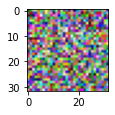

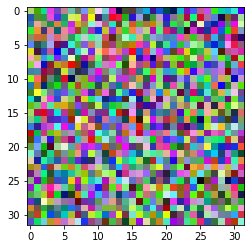

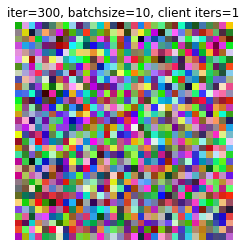

########### Showing the results for the current B-C_Iters comnbo#######
[10, 1, 1.5513947801082395e-05, tensor(72.8494, grad_fn=<MseLossBackward>), <PIL.Image.Image image mode=RGB size=32x32 at 0x7F6E9AE26D50>]
########### End of results for the current B-C_Iters comnbo#######
client training loss
3.093729019165039
fininshed training
0.08831908831908832
fininshed testing
tensor([0])
idx is below
[10, 14, 48, 49, 53, 54, 79, 92, 100, 128, 135, 169, 173, 232, 269, 282, 313, 351, 446, 480]
torch.Size([20, 3, 32, 32])
torch.Size([20, 1])
torch.Size([20, 106])
tensor([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0]])


torch.Size([20, 3, 32, 32])
torch.Size([20, 106])
Dummy label is 89.
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
8.94868469
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
178.70710754
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
178.70709229
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
178.70709229
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32

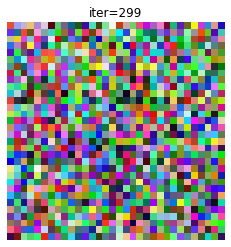

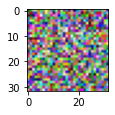

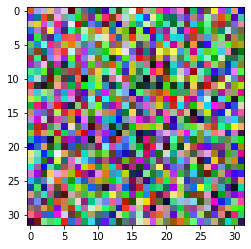

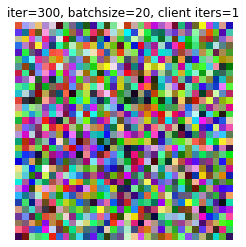

########### Showing the results for the current B-C_Iters comnbo#######
[20, 1, 2.6538597708292144e-12, tensor(1.8554e+10, grad_fn=<MseLossBackward>), <PIL.Image.Image image mode=RGB size=32x32 at 0x7F6E9B5CC710>]
########### End of results for the current B-C_Iters comnbo#######
client training loss
3.184248208999634
client training loss
2.8637757301330566
fininshed training
0.06552706552706553
fininshed testing
tensor([0])
idx is below
[10]
torch.Size([1, 3, 32, 32])
torch.Size([1, 1])
torch.Size([1, 106])
tensor([[0]])


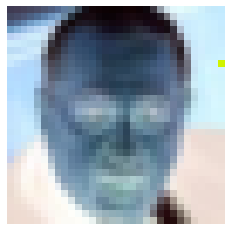

torch.Size([1, 3, 32, 32])
torch.Size([1, 106])
Dummy label is 90.
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
84.30935669
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
3.20252419
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
1.75689352
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
1.09353042
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32,

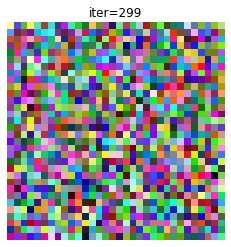

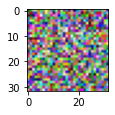

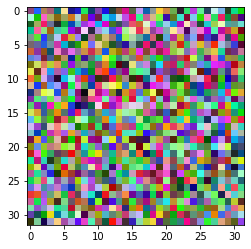

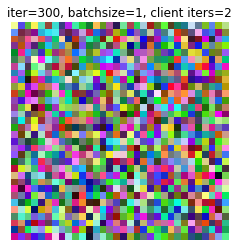

########### Showing the results for the current B-C_Iters comnbo#######
[1, 2, 0.0019817387219518423, tensor(27.0887, grad_fn=<MseLossBackward>), <PIL.Image.Image image mode=RGB size=32x32 at 0x7F6E9A98BD50>]
########### End of results for the current B-C_Iters comnbo#######
client training loss
3.043246030807495
client training loss
2.3602445125579834
fininshed training
0.38746438746438744
fininshed testing
tensor([0])
idx is below
[10, 14, 48, 49, 53]
torch.Size([5, 3, 32, 32])
torch.Size([5, 1])
torch.Size([5, 106])
tensor([[0],
        [0],
        [0],
        [0],
        [0]])


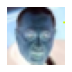

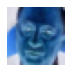

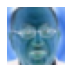

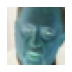

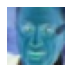

torch.Size([5, 3, 32, 32])
torch.Size([5, 106])
Dummy label is 23.
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
35.30358505
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
31.62066460
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
31.03978539
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
30.73535538
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 

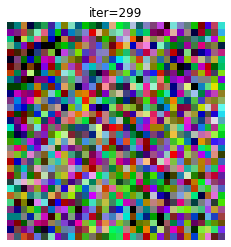

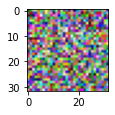

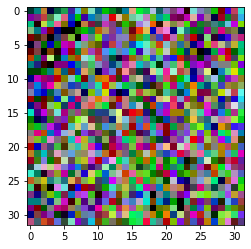

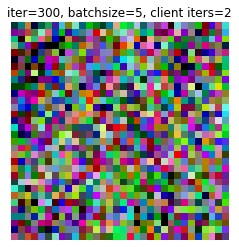

########### Showing the results for the current B-C_Iters comnbo#######
[5, 2, 5.889290062701747e-15, tensor(8.3700e+12, grad_fn=<MseLossBackward>), <PIL.Image.Image image mode=RGB size=32x32 at 0x7F6E9B0A7B90>]
########### End of results for the current B-C_Iters comnbo#######
client training loss
1.8965669870376587
client training loss
2.419929027557373
fininshed training
0.38746438746438744
fininshed testing
tensor([0])
idx is below
[10, 14, 48, 49, 53, 54, 79, 92, 100, 128]
torch.Size([10, 3, 32, 32])
torch.Size([10, 1])
torch.Size([10, 106])
tensor([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0]])


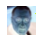

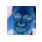

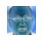

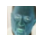

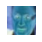

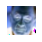

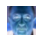

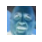

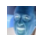

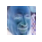

torch.Size([10, 3, 32, 32])
torch.Size([10, 106])
Dummy label is 71.
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
15.77565670
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
7.41381216
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
7.25094366
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
7.14711761
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
to

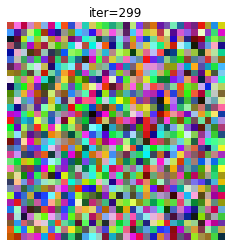

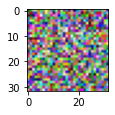

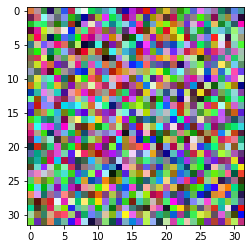

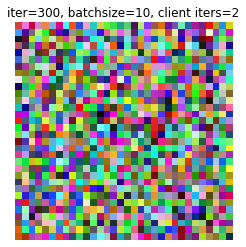

########### Showing the results for the current B-C_Iters comnbo#######
[10, 2, 9.573318675393239e-05, tensor(49.5110, grad_fn=<MseLossBackward>), <PIL.Image.Image image mode=RGB size=32x32 at 0x7F6E9B86E210>]
########### End of results for the current B-C_Iters comnbo#######
client training loss
2.223029851913452
client training loss
2.0379221439361572
fininshed training
0.38746438746438744
fininshed testing
tensor([0])
idx is below
[10, 14, 48, 49, 53, 54, 79, 92, 100, 128, 135, 169, 173, 232, 269, 282, 313, 351, 446, 480]
torch.Size([20, 3, 32, 32])
torch.Size([20, 1])
torch.Size([20, 106])
tensor([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0]])


torch.Size([20, 3, 32, 32])
torch.Size([20, 106])
Dummy label is 89.
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
6.59106064
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
5.85330009
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
5.75170469
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
5.68862486
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
tor

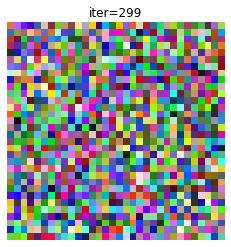

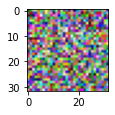

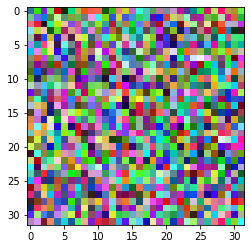

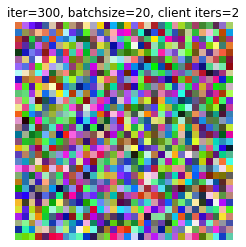

########### Showing the results for the current B-C_Iters comnbo#######
[20, 2, 0.00013986638805363327, tensor(73.4980, grad_fn=<MseLossBackward>), <PIL.Image.Image image mode=RGB size=32x32 at 0x7F6E9BB00F10>]
########### End of results for the current B-C_Iters comnbo#######
client training loss
2.181072235107422
client training loss
2.1597201824188232
client training loss
2.2260563373565674
client training loss
2.0369677543640137
client training loss
1.984245777130127
fininshed training
0.15954415954415954
fininshed testing
tensor([0])
idx is below
[10]
torch.Size([1, 3, 32, 32])
torch.Size([1, 1])
torch.Size([1, 106])
tensor([[0]])


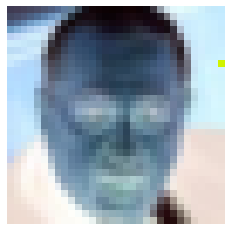

torch.Size([1, 3, 32, 32])
torch.Size([1, 106])
Dummy label is 90.
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
51.76678467
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
97.75233459
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
97.75233459
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
97.75233459
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 

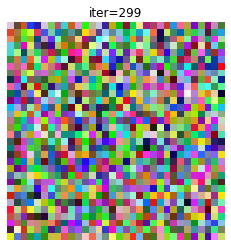

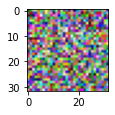

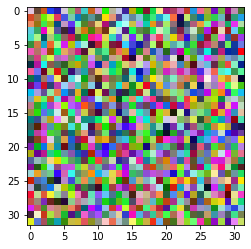

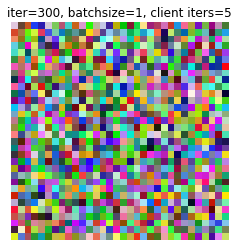

########### Showing the results for the current B-C_Iters comnbo#######
[1, 5, 6.3690488438794546e-09, tensor(36219248., grad_fn=<MseLossBackward>), <PIL.Image.Image image mode=RGB size=32x32 at 0x7F6E9A544D10>]
########### End of results for the current B-C_Iters comnbo#######
client training loss
1.9163119792938232
client training loss
1.9568246603012085
client training loss
1.7972756624221802
client training loss
1.9461058378219604
client training loss
1.9175482988357544
fininshed training
0.38746438746438744
fininshed testing
tensor([0])
idx is below
[10, 14, 48, 49, 53]
torch.Size([5, 3, 32, 32])
torch.Size([5, 1])
torch.Size([5, 106])
tensor([[0],
        [0],
        [0],
        [0],
        [0]])


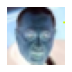

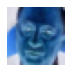

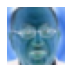

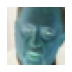

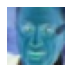

torch.Size([5, 3, 32, 32])
torch.Size([5, 106])
Dummy label is 23.
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
13.35649109
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
47.60692596
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
47.60692596
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
47.60692596
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 

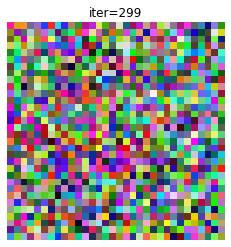

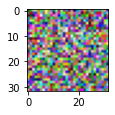

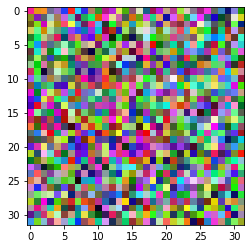

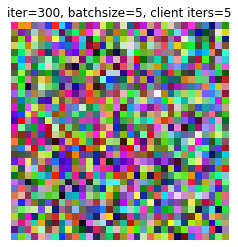

########### Showing the results for the current B-C_Iters comnbo#######
[5, 5, -4.5460996078716676e-12, tensor(1.6116e+09, grad_fn=<MseLossBackward>), <PIL.Image.Image image mode=RGB size=32x32 at 0x7F6E9C4BE150>]
########### End of results for the current B-C_Iters comnbo#######
client training loss
1.7827891111373901
client training loss
2.051086902618408
client training loss
1.9934439659118652
client training loss
2.0782928466796875
client training loss
2.0334479808807373
fininshed training
0.38746438746438744
fininshed testing
tensor([0])
idx is below
[10, 14, 48, 49, 53, 54, 79, 92, 100, 128]
torch.Size([10, 3, 32, 32])
torch.Size([10, 1])
torch.Size([10, 106])
tensor([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0]])


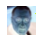

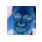

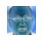

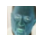

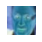

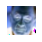

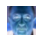

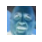

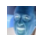

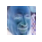

torch.Size([10, 3, 32, 32])
torch.Size([10, 106])
Dummy label is 71.
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
8.70311165
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
8.02424240
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
7.96982718
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
7.93525124
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
tor

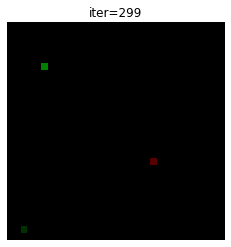

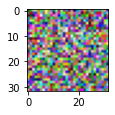

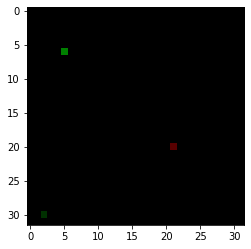

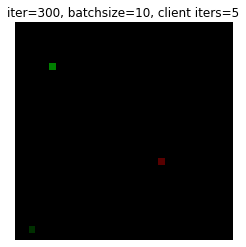

########### Showing the results for the current B-C_Iters comnbo#######
[10, 5, 7.580705609471459e-21, tensor(2.1510e+19, grad_fn=<MseLossBackward>), <PIL.Image.Image image mode=RGB size=32x32 at 0x7F6E9B65CE90>]
########### End of results for the current B-C_Iters comnbo#######
client training loss
1.987382411956787
client training loss
1.8907464742660522
client training loss
2.020369052886963
client training loss
1.9468703269958496
client training loss
1.9359782934188843
fininshed training
0.38746438746438744
fininshed testing
tensor([0])
idx is below
[10, 14, 48, 49, 53, 54, 79, 92, 100, 128, 135, 169, 173, 232, 269, 282, 313, 351, 446, 480]
torch.Size([20, 3, 32, 32])
torch.Size([20, 1])
torch.Size([20, 106])
tensor([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0]])


torch.Size([20, 3, 32, 32])
torch.Size([20, 106])
Dummy label is 89.
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
8.44136429
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
7.41871071
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
7.37140799
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
7.34413147
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
tor

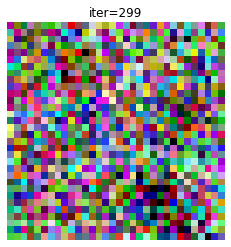

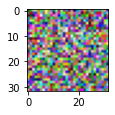

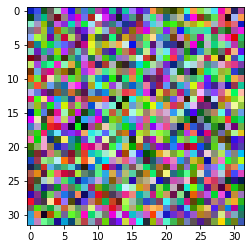

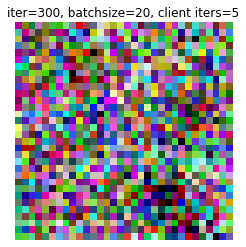

########### Showing the results for the current B-C_Iters comnbo#######
[20, 5, -8.345291824122039e-14, tensor(5.3849e+12, grad_fn=<MseLossBackward>), <PIL.Image.Image image mode=RGB size=32x32 at 0x7F6E9AAC4310>]
########### End of results for the current B-C_Iters comnbo#######
client training loss
2.1073620319366455
client training loss
1.9821817874908447
client training loss
2.1043975353240967
client training loss
1.8874614238739014
client training loss
1.9690887928009033
client training loss
1.7631579637527466
client training loss
1.738141417503357
client training loss
1.6897166967391968
client training loss
1.969497561454773
client training loss
1.6736938953399658
fininshed training
0.38746438746438744
fininshed testing
tensor([0])
idx is below
[10]
torch.Size([1, 3, 32, 32])
torch.Size([1, 1])
torch.Size([1, 106])
tensor([[0]])


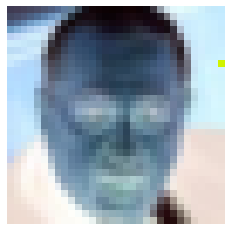

torch.Size([1, 3, 32, 32])
torch.Size([1, 106])
Dummy label is 90.
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
44.33991623
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
42.09652328
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
812.35357666
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
812.35357666
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3

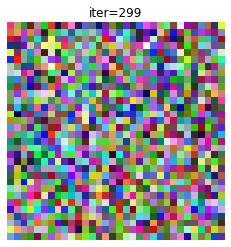

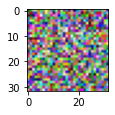

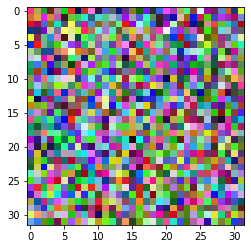

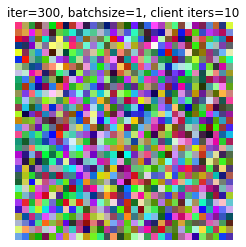

########### Showing the results for the current B-C_Iters comnbo#######
[1, 10, -3.985009822127239e-10, tensor(2.9411e+09, grad_fn=<MseLossBackward>), <PIL.Image.Image image mode=RGB size=32x32 at 0x7F6E9B959B10>]
########### End of results for the current B-C_Iters comnbo#######
client training loss
1.9548671245574951
client training loss
1.8887321949005127
client training loss
1.8338085412979126
client training loss
1.9271749258041382
client training loss
1.899510383605957
client training loss
1.9737389087677002
client training loss
1.9591119289398193
client training loss
1.8744984865188599
client training loss
1.9395672082901
client training loss
1.8456608057022095
fininshed training
0.38746438746438744
fininshed testing
tensor([0])
idx is below
[10, 14, 48, 49, 53]
torch.Size([5, 3, 32, 32])
torch.Size([5, 1])
torch.Size([5, 106])
tensor([[0],
        [0],
        [0],
        [0],
        [0]])


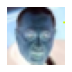

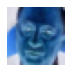

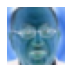

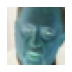

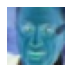

torch.Size([5, 3, 32, 32])
torch.Size([5, 106])
Dummy label is 23.
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
6.22197294
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
2.41734791
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
2.36131835
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
2.33029270
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 

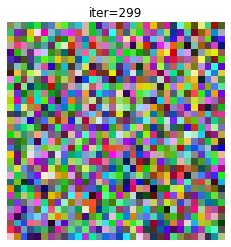

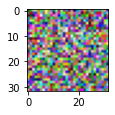

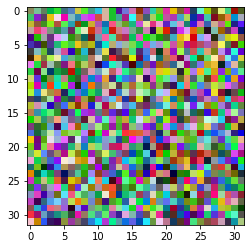

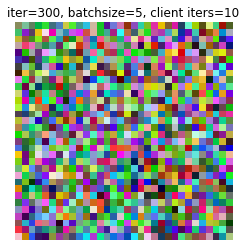

########### Showing the results for the current B-C_Iters comnbo#######
[5, 10, 1.2353135875331489e-11, tensor(2.1644e+11, grad_fn=<MseLossBackward>), <PIL.Image.Image image mode=RGB size=32x32 at 0x7F6E9A11F850>]
########### End of results for the current B-C_Iters comnbo#######
client training loss
1.7558155059814453
client training loss
1.9026790857315063
client training loss
1.9130524396896362
client training loss
2.0520451068878174
client training loss
1.9509254693984985
client training loss
1.8964626789093018
client training loss
2.0412185192108154
client training loss
1.8894555568695068
client training loss
1.8011592626571655
client training loss
1.968726396560669
fininshed training
0.38746438746438744
fininshed testing
tensor([0])
idx is below
[10, 14, 48, 49, 53, 54, 79, 92, 100, 128]
torch.Size([10, 3, 32, 32])
torch.Size([10, 1])
torch.Size([10, 106])
tensor([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        

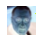

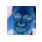

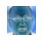

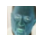

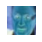

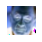

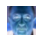

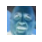

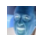

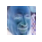

torch.Size([10, 3, 32, 32])
torch.Size([10, 106])
Dummy label is 71.
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
15.47841740
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
6.83107710
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
29.38695145
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
29.38695145
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])


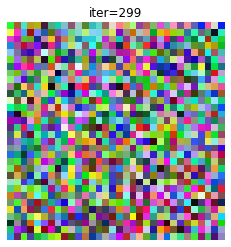

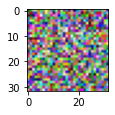

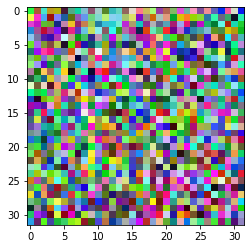

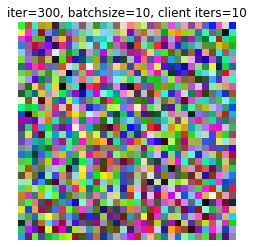

########### Showing the results for the current B-C_Iters comnbo#######
[10, 10, 1.3272760668314731e-10, tensor(6.0774e+09, grad_fn=<MseLossBackward>), <PIL.Image.Image image mode=RGB size=32x32 at 0x7F6E9AF046D0>]
########### End of results for the current B-C_Iters comnbo#######
client training loss
1.9134516716003418
client training loss
1.811889410018921
client training loss
1.9727678298950195
client training loss
1.8759766817092896
client training loss
1.9049128293991089
client training loss
1.9014114141464233
client training loss
1.8472753763198853
client training loss
1.7731075286865234
client training loss
1.8944889307022095
client training loss
1.9612764120101929
fininshed training
0.38746438746438744
fininshed testing
tensor([0])
idx is below
[10, 14, 48, 49, 53, 54, 79, 92, 100, 128, 135, 169, 173, 232, 269, 282, 313, 351, 446, 480]
torch.Size([20, 3, 32, 32])
torch.Size([20, 1])
torch.Size([20, 106])
tensor([[0],
        [0],
        [0],
        [0],
        [0],
        [

torch.Size([20, 3, 32, 32])
torch.Size([20, 106])
Dummy label is 89.
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
15.36110687
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
14.71377850
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
14.62300301
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
14.58248138
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])

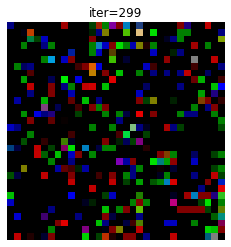

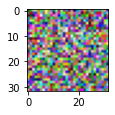

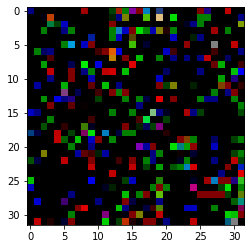

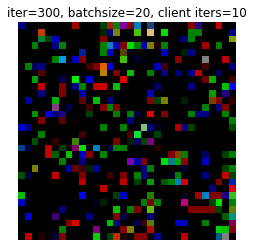

########### Showing the results for the current B-C_Iters comnbo#######
[20, 10, -1.3528808910056705e-16, tensor(2.5832e+15, grad_fn=<MseLossBackward>), <PIL.Image.Image image mode=RGB size=32x32 at 0x7F6E9B6A5E10>]
########### End of results for the current B-C_Iters comnbo#######
client training loss
2.0501861572265625
client training loss
1.9807533025741577
client training loss
2.11203670501709
client training loss
1.890684962272644
client training loss
1.9333105087280273
client training loss
1.82313871383667
client training loss
1.8149513006210327
client training loss
1.7311896085739136
client training loss
1.944993019104004
client training loss
1.6883188486099243
client training loss
1.9451427459716797
client training loss
1.9548077583312988
client training loss
1.9840290546417236
client training loss
1.9373055696487427
client training loss
2.0927670001983643
client training loss
2.0604469776153564
client training loss
1.8363765478134155
fininshed training
0.38746438746438744
fini

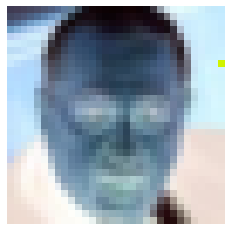

torch.Size([1, 3, 32, 32])
torch.Size([1, 106])
Dummy label is 90.
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
31.35326385
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
821.46905518
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
821.46905518
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
821.46905518
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 

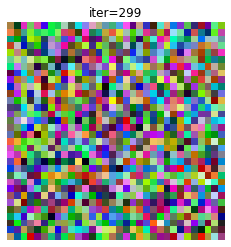

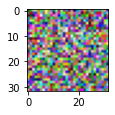

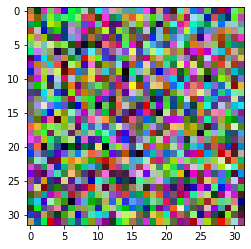

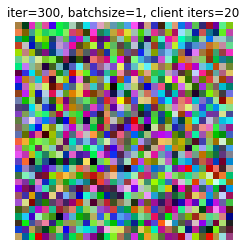

########### Showing the results for the current B-C_Iters comnbo#######
[1, 20, 3.700068723633265e-11, tensor(1.0347e+12, grad_fn=<MseLossBackward>), <PIL.Image.Image image mode=RGB size=32x32 at 0x7F6E9A9B2F10>]
########### End of results for the current B-C_Iters comnbo#######
client training loss
1.907861590385437
client training loss
1.8963158130645752
client training loss
1.8378443717956543
client training loss
1.9471873044967651
client training loss
1.861710786819458
client training loss
2.040879487991333
client training loss
1.9278879165649414
client training loss
1.8330183029174805
client training loss
1.980120301246643
client training loss
1.8553016185760498
client training loss
2.0339138507843018
client training loss
1.889135718345642
client training loss
2.1355910301208496
client training loss
1.9322445392608643
client training loss
1.782357931137085
client training loss
1.8159459829330444
client training loss
1.8772222995758057
fininshed training
0.38746438746438744
fininsh

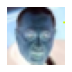

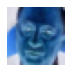

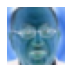

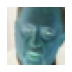

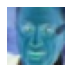

torch.Size([5, 3, 32, 32])
torch.Size([5, 106])
Dummy label is 23.
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
8.64272308
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
6.72410393
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
6.65348053
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
6.61813402
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 

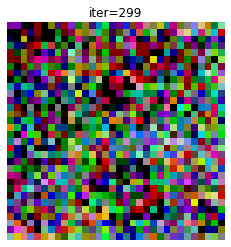

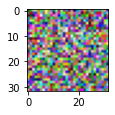

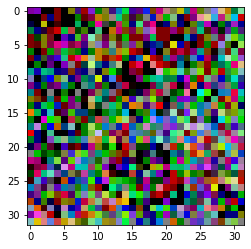

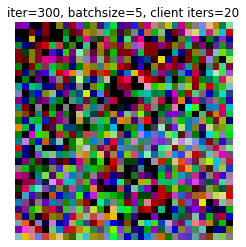

########### Showing the results for the current B-C_Iters comnbo#######
[5, 20, -8.5693416948464e-15, tensor(3.6604e+13, grad_fn=<MseLossBackward>), <PIL.Image.Image image mode=RGB size=32x32 at 0x7F6E9B0A9D90>]
########### End of results for the current B-C_Iters comnbo#######
client training loss
1.7161637544631958
client training loss
1.9017119407653809
client training loss
1.9905691146850586
client training loss
2.081270694732666
client training loss
1.9627830982208252
client training loss
1.882035732269287
client training loss
2.004784345626831
client training loss
1.88201105594635
client training loss
1.8038641214370728
client training loss
1.9667185544967651
client training loss
1.8776315450668335
client training loss
2.0016579627990723
client training loss
1.9525210857391357
client training loss
1.8784456253051758
client training loss
2.015016794204712
client training loss
1.793931007385254
client training loss
1.7502444982528687
fininshed training
0.38746438746438744
fininshed

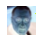

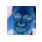

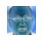

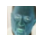

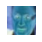

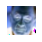

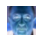

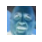

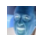

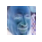

torch.Size([10, 3, 32, 32])
torch.Size([10, 106])
Dummy label is 71.
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
6.03154945
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
5.13183546
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
5.09286594
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
5.06470156
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
tor

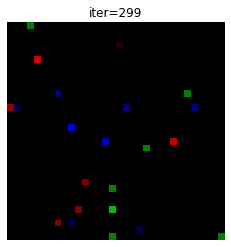

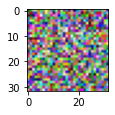

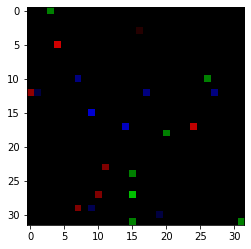

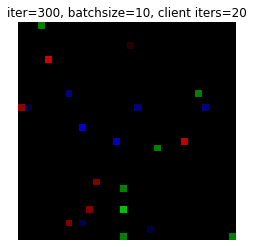

########### Showing the results for the current B-C_Iters comnbo#######
[10, 20, 6.39291913085589e-19, tensor(8.6781e+17, grad_fn=<MseLossBackward>), <PIL.Image.Image image mode=RGB size=32x32 at 0x7F6E9A423050>]
########### End of results for the current B-C_Iters comnbo#######
client training loss
1.913781762123108
client training loss
1.8451645374298096
client training loss
1.9772604703903198
client training loss
1.8740290403366089
client training loss
1.8721954822540283
client training loss
1.9250785112380981
client training loss
1.837559461593628
client training loss
1.7697992324829102
client training loss
1.9329856634140015
client training loss
1.940524697303772
client training loss
1.878724455833435
client training loss
2.0144386291503906
client training loss
2.009098768234253
client training loss
1.829398512840271
client training loss
1.9278547763824463
client training loss
1.910923957824707
client training loss
1.9216375350952148
fininshed training
0.38746438746438744
fininshe

torch.Size([20, 3, 32, 32])
torch.Size([20, 106])
Dummy label is 89.
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
7.61784840
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
7.37740660
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
34.29172134
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
34.29172134
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
t

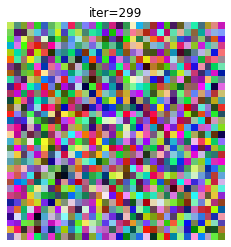

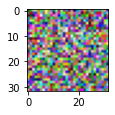

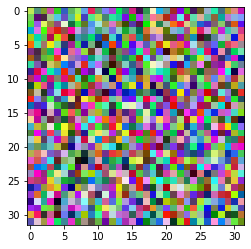

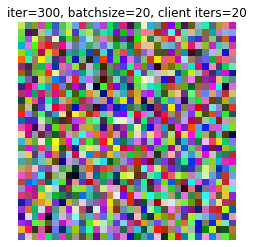

########### Showing the results for the current B-C_Iters comnbo#######
[20, 20, 1.0822667631874006e-12, tensor(4.6767e+10, grad_fn=<MseLossBackward>), <PIL.Image.Image image mode=RGB size=32x32 at 0x7F6E9A4A1690>]
########### End of results for the current B-C_Iters comnbo#######
client training loss
2.039793014526367
client training loss
1.9444972276687622
client training loss
2.092154026031494
client training loss
1.9546189308166504
client training loss
1.972264289855957
client training loss
1.8490937948226929
client training loss
1.7732681035995483
client training loss
1.7035964727401733
client training loss
1.9479058980941772
client training loss
1.6684153079986572
client training loss
1.9745733737945557
client training loss
1.97964608669281
client training loss
1.9520303010940552
client training loss
1.8930377960205078
client training loss
2.0258350372314453
client training loss
2.020007371902466
client training loss
1.839089035987854
fininshed training
0.38746438746438744
finins

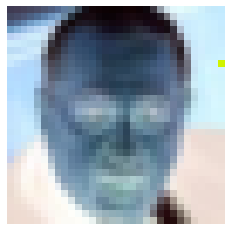

torch.Size([1, 3, 32, 32])
torch.Size([1, 106])
Dummy label is 90.
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
22.98381615
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
658.83227539
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
658.83227539
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
658.83227539
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 

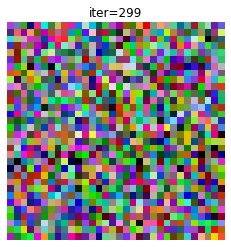

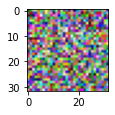

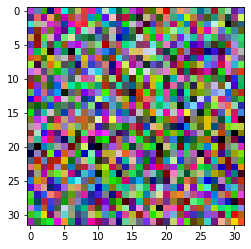

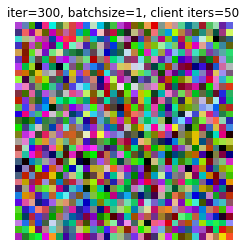

########### Showing the results for the current B-C_Iters comnbo#######
[1, 50, 4.348336794801622e-12, tensor(3.6059e+12, grad_fn=<MseLossBackward>), <PIL.Image.Image image mode=RGB size=32x32 at 0x7F6E9BB8FAD0>]
########### End of results for the current B-C_Iters comnbo#######
client training loss
1.9046329259872437
client training loss
1.8986461162567139
client training loss
1.819430947303772
client training loss
1.9168697595596313
client training loss
1.8561391830444336
client training loss
2.0129504203796387
client training loss
1.9248998165130615
client training loss
1.8329695463180542
client training loss
1.9646012783050537
client training loss
1.8401740789413452
client training loss
2.033808469772339
client training loss
1.8838409185409546
client training loss
2.138774871826172
client training loss
1.9370535612106323
client training loss
1.8092368841171265
client training loss
1.7993645668029785
client training loss
1.8735820055007935
fininshed training
0.38746438746438744
fini

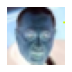

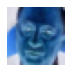

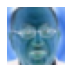

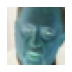

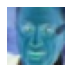

torch.Size([5, 3, 32, 32])
torch.Size([5, 106])
Dummy label is 23.
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
13.40623665
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
13.21106529
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
13.21106052
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
363.38595581
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3,

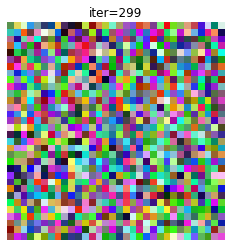

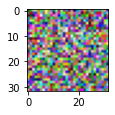

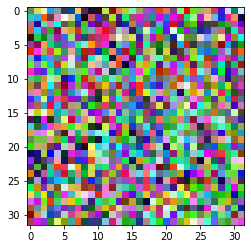

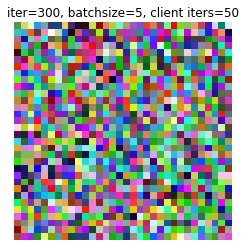

########### Showing the results for the current B-C_Iters comnbo#######
[5, 50, 8.638489923384896e-09, tensor(30528750., grad_fn=<MseLossBackward>), <PIL.Image.Image image mode=RGB size=32x32 at 0x7F6E9A94C790>]
########### End of results for the current B-C_Iters comnbo#######
client training loss
1.732696294784546
client training loss
1.883517861366272
client training loss
1.9619810581207275
client training loss
2.052093744277954
client training loss
1.9455535411834717
client training loss
1.8840457201004028
client training loss
2.0171420574188232
client training loss
1.8929469585418701
client training loss
1.7979830503463745
client training loss
1.9622373580932617
client training loss
1.8956468105316162
client training loss
2.013193130493164
client training loss
1.9335832595825195
client training loss
1.880788803100586
client training loss
2.002119302749634
client training loss
1.793413758277893
client training loss
1.7610044479370117
fininshed training
0.38746438746438744
fininshed

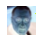

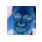

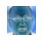

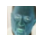

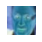

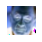

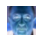

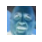

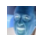

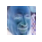

torch.Size([10, 3, 32, 32])
torch.Size([10, 106])
Dummy label is 71.
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
6.26027584
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
4.12604618
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
4.12604618
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
4.12604618
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
tor

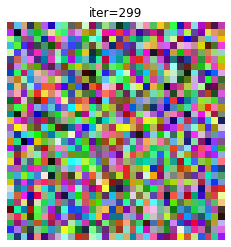

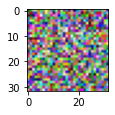

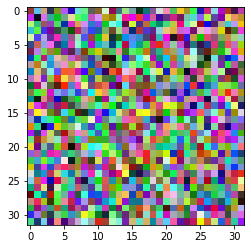

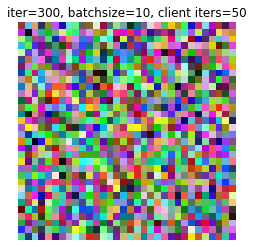

########### Showing the results for the current B-C_Iters comnbo#######
[10, 50, -3.2361121161256223e-12, tensor(2.8114e+10, grad_fn=<MseLossBackward>), <PIL.Image.Image image mode=RGB size=32x32 at 0x7F6E9A956350>]
########### End of results for the current B-C_Iters comnbo#######
client training loss
1.9151875972747803
client training loss
1.8542736768722534
client training loss
1.9879734516143799
client training loss
1.8808493614196777
client training loss
1.838095784187317
client training loss
1.8955605030059814
client training loss
1.845112919807434
client training loss
1.7796049118041992
client training loss
1.9448984861373901
client training loss
1.9357547760009766
client training loss
1.8824361562728882
client training loss
2.0300240516662598
client training loss
2.0105788707733154
client training loss
1.8363606929779053
client training loss
1.930318832397461
client training loss
1.8982479572296143
client training loss
1.941735029220581
fininshed training
0.38746438746438744
fi

torch.Size([20, 3, 32, 32])
torch.Size([20, 106])
Dummy label is 89.
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
6.29976416
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
3.09730101
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
2.95047045
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
2.92333603
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
tor

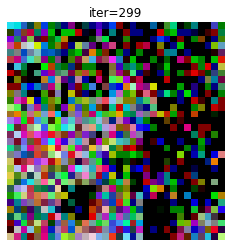

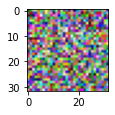

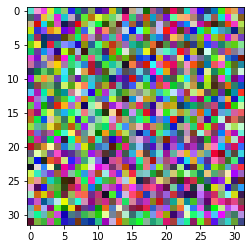

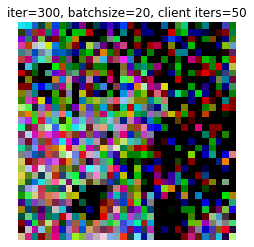

########### Showing the results for the current B-C_Iters comnbo#######
[20, 50, -2.5453587822128797e-15, tensor(2.6373e+14, grad_fn=<MseLossBackward>), <PIL.Image.Image image mode=RGB size=32x32 at 0x7F6E9B231D90>]
########### End of results for the current B-C_Iters comnbo#######


In [5]:
# Grand code to get all batch sizes and cleint iteration combos


import itertools
import torch.nn.functional as F
import torchvision.transforms as transforms
import torch.optim as optim
from torch.autograd import Variable
from torch.utils import data

from sklearn.datasets import fetch_lfw_people, fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from keras.datasets import cifar10
from sklearn.datasets import fetch_openml as fetch_mldata

grandssimNmses = []
iter_ = 0
batch_size = [1,5,10,20,32]
maxiters = [1,2,5,10,20,50]

combos = [[1,5,10,20,32],[1,2,5,10,20,50]]
combos = list(itertools.product(*combos)) 




lfw_people=fetch_lfw_people(min_faces_per_person=55,color=True,slice_=(slice(61,189),slice(61,189)),resize=0.25)
x=lfw_people.images
y=lfw_people.target

target_names=lfw_people.target_names
n_classes=target_names.shape[0]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25,shuffle=False)

        
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)


x_train = torch.FloatTensor(X_train).to(device)
x_train = x_train.transpose(2,3).transpose(1,2)
y_train = [int(x) for x in y_train]
y_train = torch.LongTensor(y_train).to(device)

x_test = torch.FloatTensor(X_test).to(device)
x_test = x_test.transpose(2,3).transpose(1,2)
y_test = [int(x) for x in y_test]
y_test = torch.LongTensor(y_test).to(device)


training = data.TensorDataset(x_train,y_train)
testing = data.TensorDataset(x_test,y_test)

dst_tensor=training
plt.imshow(tt(dst_tensor[0][0].cpu()))
criterion_train = nn.CrossEntropyLoss()
optimizer_train = optim.Adam(net.parameters(),lr=0.01)#,momentum=0.9)
trainloader = torch.utils.data.DataLoader(training,batch_size=64, shuffle=True)

combos = [[1,2,5,10,20,50],[1,5,10,20]]
combos = list(itertools.product(*combos)) 
batchmem = -1
for curriterlim, currbatchsize in combos:
  results = [currbatchsize, curriterlim]
  iter_ = 0
  for epoch in range(1):

      for i,data in enumerate(trainloader,0):
    
          #if epoch>=1:
          if iter_>=curriterlim and batchmem == currbatchsize:
              break
          batchmem = currbatchsize
          iter_=iter_+1
          #print (iter_)
          inputs,label = data
          
          inputs,label =  Variable(inputs),Variable(label) 
        
          optimizer_train.zero_grad()
          
      
          outputs_benign=net(inputs)
          #outputs_benign = F.softmax(outputs_benign, dim=-1)
          #print (outputs_benign[0])
      
          loss_benign =  criterion_train(outputs_benign,label)
        
          #print("loss computed")
          loss_benign.backward()
          #print("loss BP")
          optimizer_train.step()
          print("client training loss")
          #if i%2000==0:
          print (loss_benign.item())
          #torch.save(net.state_dict(),'./LFW_net.pth')  
        
    
  print ('fininshed training')
  total = len(y_test)
  acc =0.0
  for ct in range(total):
      testing_data = tt(testing[ct][0].cpu())
      testing_data1 = tp(testing_data).to(device)
      testing_data2 = testing_data1.view(1, *testing_data1.size())
      y_pred = net(testing_data2)
      predicted = torch.argmax(y_pred)
    
      if predicted == y_test[ct]:
          acc=acc+1
  accuracy = acc / total
  print (accuracy)
  print ('fininshed testing')





  ######### honest participant #########
  img_index = 2   #use img_index
  dst_pil = tt(dst_tensor[img_index][0].cpu())   #use img_index

  gt_data = tp(dst_pil).to(device)
  gt_data = torch.unsqueeze(gt_data,0)

  gt_label = dst_tensor[img_index][1].long().to(device) #use img_index
  gt_label = gt_label.view(1, )
  gt_onehot_label = label_to_onehot(gt_label, num_classes=106)

  # for i in range(0,100):
  #   plt.imshow(tt(dst_tensor[i][0].cpu()))
  #   plt.show()
  # plt.show()
  # plt.axis('off')
  # plt.savefig("./lfw_batch_idx_12")

  print(gt_label)

  batch = currbatchsize
  #idx_m = [20,25,32,33,48,79,84]
  #idx_m = [2]
  idx_m = []
  match = 1
  for s in range(1000):
      if dst_tensor[s][1]==gt_label:
          if match==1:
              match = match + 1
          else:    
              idx_m.append(s)
          
          # dst_pil = tt(dst_tensor[s][0].cpu())
          # plt.imshow(dst_pil)
          # plt.axis('off')
          #plt.savefig("./original/lfw_batch_idx_%s"%(len(idx_m)))
          
          
          if len(idx_m)==batch:
              break
  print("idx is below")
  print (idx_m)
              
  for bat in range(batch-1):
              dst_pil = tt(dst_tensor[idx_m[bat+1]][0].cpu())   #use img_index
              tmp = torch.unsqueeze(tp(dst_pil).to(device),0)
              #print(tmp.shape)
              gt_data = torch.cat((gt_data,tmp),0)

              gt_label_tmp = dst_tensor[idx_m[bat+1]][1].long().to(device) #use img_index
              gt_label_tmp = gt_label_tmp.view(1, )
              gt_label = torch.cat((gt_label,gt_label_tmp),0)
              gt_onehot_label = torch.cat((gt_onehot_label,label_to_onehot(gt_label_tmp, num_classes=106)),0)

  gt_label = torch.reshape(gt_label,(-1,1))    
  print (gt_data.shape)
  print (gt_label.shape)
  print (gt_onehot_label.shape)
  print (gt_label)
  for i in range(batch):
    plt.subplot(1,batch,i+1)
    plt.imshow(tt(gt_data[i].cpu()))
    plt.axis("off")
    plt.show()

  plt.imshow(dst_pil)
  plt.axis('off')
  #plt.savefig("./attack_image/original")

  plt.title("Ground truth image")
  # print("GT label is %d." % gt_label.item(), "\nOnehot label is %d." % torch.argmax(gt_onehot_label, dim=-1).item())

  # compute original gradient 
  out = net(gt_data)
  y = criterion(out, gt_onehot_label)
  dy_dx = torch.autograd.grad(y, net.parameters())


  # share the gradients with other clients
  original_dy_dx = list((_.detach().clone() for _ in dy_dx))






  # generate dummy data and label
  torch.manual_seed(1890)

  usePatterned = False
  print(gt_data.size())
  aaa = torch.rand([3,8,8])
  bbb = torch.cat((aaa,aaa),dim=1)
  ccc = torch.cat((bbb,bbb),dim=1)
  ddd = torch.cat((ccc,ccc),dim=2)
  eee = torch.cat((ddd,ddd),dim=2)
  dummy_data5 = torch.unsqueeze(eee,dim=0).to(device).requires_grad_(True)

  dummy_data = torch.randn(gt_data.size()).to(device).requires_grad_(True)
  dummy_label = torch.randn(gt_onehot_label.size()).to(device).requires_grad_(True)

  print(dummy_label.size())

  if usePatterned:
    dummy_data = dummy_data5

  #aaa = torch.rand([3,16,16])
  #bbb = torch.cat((aaa,aaa),dim=1)
  #ccc = torch.cat((bbb,bbb),dim=2)
  #dummy_data = torch.unsqueeze(ccc,dim=0).to(device).requires_grad_(True)


  plt.imshow(tt(dummy_data[0].cpu()))
  plt.title("Dummy data")
  print("Dummy label is %d." % torch.argmax(dummy_label[0], dim=-1).item())






  ###### LAST CELL #####

  from pytorch_msssim import ssim
  import torch.nn.functional as F
  optimizer = torch.optim.LBFGS([dummy_data, dummy_label] )

  history = []
  history_batch = []
  history.append(tt(dummy_data[0].cpu()))
  mses = []
  percept_dis = np.zeros(300)
  recover_dis = np.zeros(300)
  for iters in range(300):
      
      plt.imshow(tt(dummy_data[0].cpu()))
      plt.title("iter=%d" % (iters))
      plt.axis('off')
      
      print(dummy_data.size())
      print(gt_data[0].size())
      percept_dis[iters]=ssim(dummy_data[0][None,:].cpu(),gt_data[0][None,:],data_range=0).item()
      recover_dis[iters]=torch.dist(dummy_data.cpu(),gt_data,2).item()
      
          
      #print("Dummy label is %d." % torch.argmax(dummy_label, dim=-1).item())
      #plt.savefig("./attack_image/gif_iters_%s_label_%s"%(iters,torch.argmax(dummy_label, dim=-1).item()))
      #plt.clf()
      
      
      def closure():
          optimizer.zero_grad()

          pred = net(dummy_data) 
          dummy_onehot_label = F.softmax(dummy_label, dim=-1)
          
          #print (pred.shape)
          #print (dummy_onehot_label)
          dummy_loss = criterion(pred, dummy_onehot_label) # TODO: fix the gt_label to dummy_label in both code and slides.
          dummy_dy_dx = torch.autograd.grad(dummy_loss, net.parameters(), create_graph=True)
          dummy_dy_dp = torch.autograd.grad(dummy_loss, dummy_data, create_graph=True)
          #print (dummy_dy_dp[0].shape)
          
          grad_diff = 0
          grad_count = 0
          count =0
          for gx, gy in zip(dummy_dy_dx, original_dy_dx): # TODO: fix the variablas here
              grad_diff += ((gx - gy) ** 2).sum()
              
              
              grad_count += gx.nelement()
              
              #if count == 9:
              #    break
              count=count+1
          # grad_diff = grad_diff / grad_count * 1000
          grad_diff.backward()
          #print (count)
          
          #print (dummy_dy_dx)
          #print (original_dy_dx)
          
          
          return grad_diff
      

        
      optimizer.step(closure)
      if iters % 5 == 0: 
          current_loss = closure()
          print ("%.8f" % current_loss.item())
          #print(iters, "%.8f" % current_loss.item())
      history.append(tt(dummy_data[0].cpu()))
      
      mses.append(F.mse_loss(gt_data[0, :], dummy_data[0, :]))
    
  plt.figure(figsize=(12, 1.5))
  # iter_idx = [0,20,40,60,80,100,120,140,160,180] 
  iter_idx = [0,5,10,20,50,80,100,300] 
  # for i in range(8):
  #   plt.subplot(1, 8, i + 1)
  #   plt.imshow(history[iter_idx[i]])
  #   plt.title("iter=%d, batchsize=%d, client iters=%d" %(300,currbatchsize,curriterlim))
  #   plt.axis('off')
  # plt.savefig("./attack_image/random.png")
  plt.imshow(history[0])
  plt.show()
  plt.imshow(history[100])
  plt.show()
  plt.imshow(history[299])
  plt.title("iter=%d, batchsize=%d, client iters=%d" %(300,currbatchsize,curriterlim))
  plt.axis('off')
  plt.show() 
  results.append(percept_dis[299])
  results.append(mses[299])    
  results.append(history[299])
  print("########### Showing the results for the current B-C_Iters comnbo#######")
  print(results)
  print("########### End of results for the current B-C_Iters comnbo#######")

  
  grandssimNmses.append(results)
  #np.savetxt('ssim_dlg.out',percept_dis,fmt="%4f")
  #np.savetxt('mse_ours.out',recover_dis,fmt="%4f")

      
  #     for bat in range(batch-1):
  #         history_batch.append(tt(dummy_data[bat].cpu()))
      
